## Loading Libraries

Let's import all the necessary packages first. You can safely ignore this section.

In [1]:
import java.util.Random;
import java.lang.*;

In [2]:
%%loadFromPOM
<dependency>
    <groupId>org.knowm.xchart</groupId>
    <artifactId>xchart</artifactId>
    <version>3.5.2</version>
</dependency>

In [3]:
%maven org.knowm.xchart:xchart:3.5.2
import org.knowm.xchart.*;

## Helper Methods

Let's code two helper methods:

* random array generator
* array printer

It is assumed that you are fully capable of coding two similar methods by yourself. If you are new to Java (but have some experience with a different language), playing with these methods will help you get familiar with Java faster.

In [4]:
// random array generator
public int[] randomArr(int size) {
    Random r = new Random();
    int[] arr = new int[size];
    
    for (int i = 0; i < size; i++) {
        arr[i] = r.nextInt(1000) + 1;
    }
    
    return arr;
}

// array printer
public void printArr(int[] arr) {
    for (int num : arr) {
        System.out.print(num + " ");
    }
    System.out.println();
}

// array deep copy
public void copyArray(int[] from, int[] to) {
    if (from.length != to.length) {
        System.exit(0);
    }
    
    for (int i = 0; i < from.length; i++) {
        to[i] = from[i];
    }
}

## Time Complexity - maxFind

Here is the maxFind method and its sanity check:

In [5]:
// maxFinder
public int maxFind(int[] arr) {
    int max = arr[0];
    
    for (int num: arr) {
        if (num > max) {
            max = num;
        }
    }
    
    return max;
}

// proof that maxFind works
int[] arr = randomArr(15);
printArr(arr);
System.out.println("The max number is " + maxFind(arr));

686 145 11 796 848 644 781 277 384 919 53 501 523 650 442 
The max number is 919


Let's try to find the relationship between input size (i.e., the length of input array) and steps of maxFind takes to find the max number. Lets modify the maxFind method with a flag. When flag is set to true, the method returns the steps the method takes to fully execute the method.

In [6]:
// track steps of maxFind
public int maxFindTrack(int[] arr, boolean trackSteps) {
    // init steps
    int steps = 0;
    
    int max = arr[0];
    
    // increment steps
    if (trackSteps) {
        steps++;
    }
    
    for (int num: arr) {
        
        if (num > max) {
            max = num;

            // increment steps
            if (trackSteps) {
                steps++;
            }
        }
        
        // increment steps
        if (trackSteps) {
            steps++;
        }
    }
    
    // increment steps
    if (trackSteps) {
        steps++;
        return steps;
    }
    
    return max;
}



0 3 4 5 6 9 11 11 10 11 13 14 16 18 20 


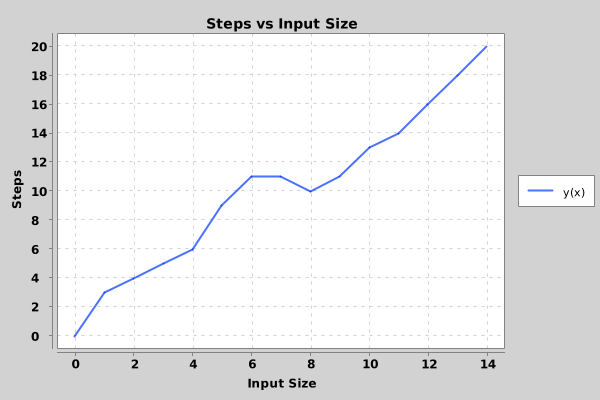

In [13]:
// proof that maxFindTrack works
int size = 15;
int[] steps = new int[size];
for (int i = 1; i < steps.length; i++) {
    int[] arr = randomArr(i);
    steps[i] = maxFindTrack(arr, true);
}
printArr(steps);

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// steps - convert int to double for plotting
double[] yData = new double[size];
for (int i = 0; i < yData.length; i++) {
    yData[i] = steps[i];
}

// plot it
XYChart chart = QuickChart.getChart("Steps vs Input Size", "Input Size", "Steps", "y(x)", xData, yData);
BitmapEncoder.getBufferedImage(chart);

To quantify the steps it takes to execute maxFind more accurately, we can further modify maxFind method to deal with the worst case scenario and the best case scenarios:

* worst: an ascending sorted array
* best: a descending sorted array

In [9]:
// track steps of maxFind
public int maxFindTrackUpdate(int[] arr, boolean trackSteps, String condition) {
    // init arr depending on condition
    if (condition.equals("worst")) {
        Arrays.sort(arr);
    }
    
    if (condition.equals("best")) {
        Arrays.sort(arr);
        for (int i = 0; i < arr.length/2; i++) {
            int temp = arr[i];
            arr[i] = arr[arr.length-1];
            arr[arr.length-1] = temp;
        }
    }
    
    // init steps
    int steps = 0;
    
    int max = arr[0];
    
    // increment steps
    if (trackSteps) {
        steps++;
    }
    
    for (int num: arr) {
        
        if (num > max) {
            max = num;

            // increment steps
            if (trackSteps) {
                steps++;
            }
        }
        
        // increment steps
        if (trackSteps) {
            steps++;
        }
    }
    
    // increment steps
    if (trackSteps) {
        steps++;
        return steps;
    }
    
    return max;
}

Let's plot the steps it takes to find max from a randomly generated array with 30 integers for different scenarios.

Best: 0 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 
Normal: 0 3 5 6 7 9 11 10 10 13 13 15 17 18 18 19 22 21 24 24 24 23 25 27 27 29 31 34 32 36 
Worst: 0 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 48 51 52 54 57 59 


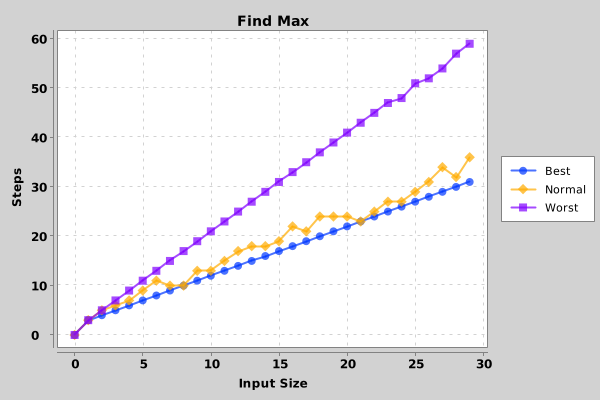

In [16]:
// predetermined size
size = 30;

// storage of steps
int[] best = new int[size];
int[] normal = new int[size];
int[] worst = new int[size];

// populate storage
for (int i = 1; i < size; i++) {
    int[] tempB = randomArr(i);
    int[] tempN = new int[tempB.length];
    copyArray(tempB, tempN);
    int[] tempW = new int[tempB.length];
    copyArray(tempB, tempW);
    
    best[i] = maxFindTrackUpdate(tempB, true, "best");
    normal[i] = maxFindTrackUpdate(tempN, true, "normal");
    worst[i] = maxFindTrackUpdate(tempW, true, "worst");
}


System.out.print("Best: ");
printArr(best);
System.out.print("Normal: ");
printArr(normal);
System.out.print("Worst: ");
printArr(worst);

// size of input - convert int to double for plotting
double[] xData = new double[size];
for (int i = 1; i < xData.length; i++) {
    xData[i] = i;
}

// best - convert int to double for plotting
double[] yDataB = new double[size];
for (int i = 0; i < yDataB.length; i++) {
    yDataB[i] = best[i];
}

// normal - convert int to double for plotting
double[] yDataN = new double[size];
for (int i = 0; i < yDataN.length; i++) {
    yDataN[i] = normal[i];
}

// worst - convert int to double for plotting
double[] yDataW = new double[size];
for (int i = 0; i < yDataW.length; i++) {
    yDataW[i] = worst[i];
}

// plot it
XYChart chart = new XYChartBuilder().width(600).height(400).title("Find Max").xAxisTitle("Input Size").yAxisTitle("Steps").build();
chart.addSeries("Best", xData, yDataB);
chart.addSeries("Normal", xData, yDataN);
chart.addSeries("Worst", xData, yDataW);
BitmapEncoder.getBufferedImage(chart);

## Time Complexity - Fibonacci Sequence